In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [175]:
plt.rcParams['figure.figsize'] = [30, 15]
plt.rcParams['axes.grid'] = True


def plot(df, mask, light=True, distance=True):
    
    if mask is not None:
        data = df[mask]
    else:
        data = df
        
    if light:
        trigger_light = data['trigger light'].astype(float)*1
        data['light sensor 2'].plot(c=(0.5,0.5,1,0.2))
        data['light sensor 1'].plot(c=(0.4,0.5,0,0.3))
        trigger_light.plot(c=(0.1,0.5,0.1,0.5))
    
    if distance:
        trigger_distance = data['trigger distance'].astype(float)*1
        data['distance'].plot(c=(0,0,0,0.5))
        trigger_distance.plot(c=(1,0.2,0,1))



    plt.legend()
    plt.show()

In [152]:
# csvfile = '../logs/brievenbus_ingmar_20200508.csv'
# csvfile = '../logs/brievenbus_sjors_20200508.csv'
# start_time =  '2020-6-8 19:48'

csvfile = '../logs/brievenbus_ingmar_20200620.csv'
start_time =  '2020-6-20 9:40'

# csvfile = '../logs/brievenbus_sjors_20200620.csv'
# start_time =  '2020-6-20 14:15'



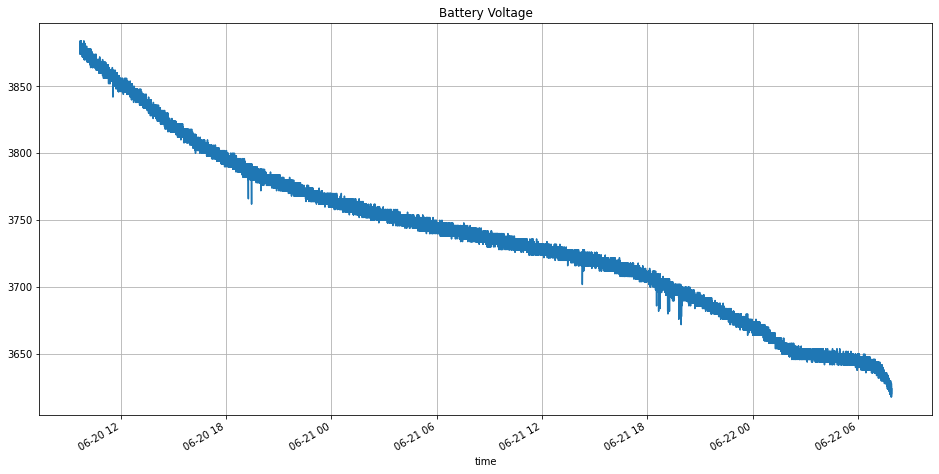

In [165]:
header = ['time', 'light sensor 1', 'light sensor 2', 'vbat', 'distance', 'trigger light', 'trigger distance']
data = pd.read_csv(csvfile, names=header, index_col=0)

start = pd.Timestamp(start_time, tz=None)
data.index = pd.to_datetime(data.index + int(start.to_datetime64())/1e6, unit='ms')

data = data[:-1000]
# fix data
data.loc[(data.distance > 65000), 'distance'] = np.nan
data.loc[(data['light sensor 1'] > 65000), 'light sensor 1'] = np.nan
data.loc[(data['light sensor 2'] > 65000), 'light sensor 2'] = np.nan

data['vbat'].plot()
plt.title('Battery Voltage')

# normalize
data = data/data.max()

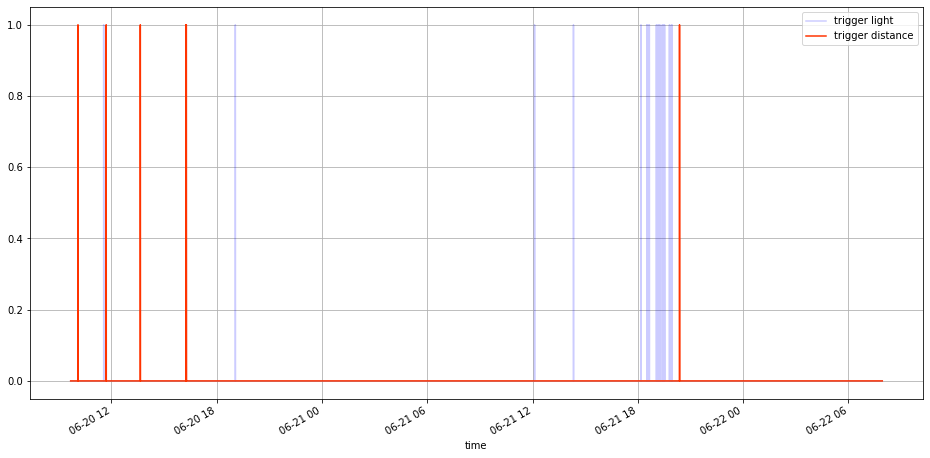

In [166]:
trigger_light = data['trigger light'].astype(float)*1
trigger_distance = data['trigger distance'].astype(float)*1
trigger_light.plot(c=(0,0,1,0.2))
trigger_distance.plot(c=(1,0.2,0,1))
plt.legend()
plt.show()

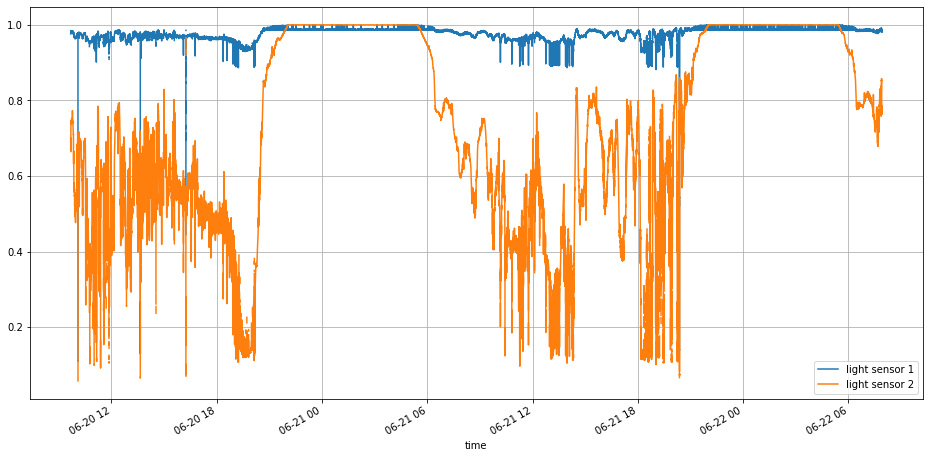

In [167]:
data['light sensor 1'].plot()
data['light sensor 2'].plot()
plt.legend()

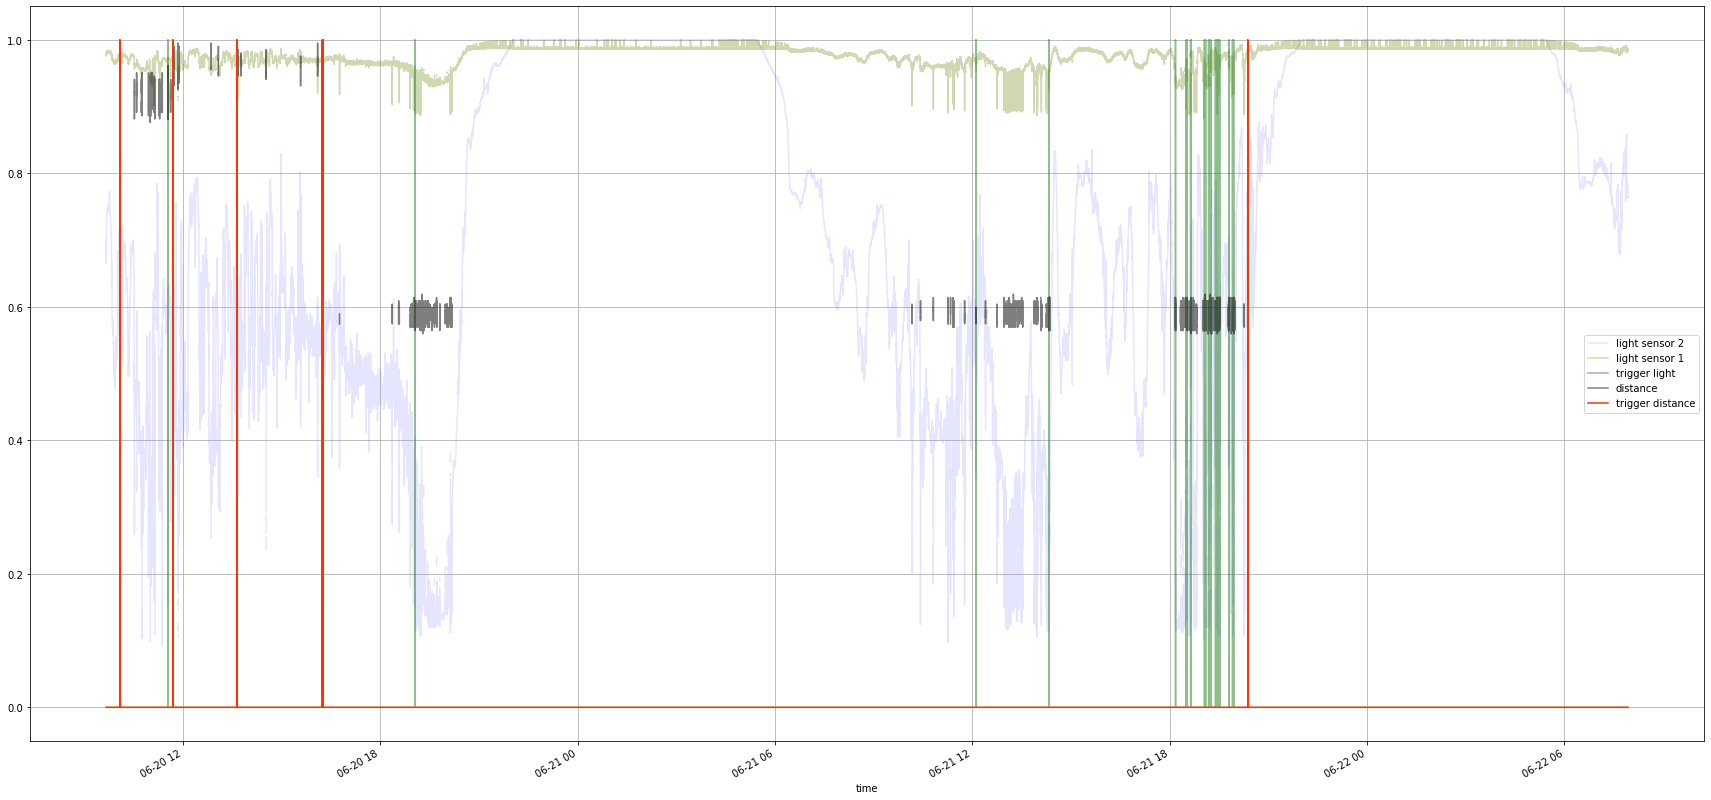

In [176]:
plot(data, None)

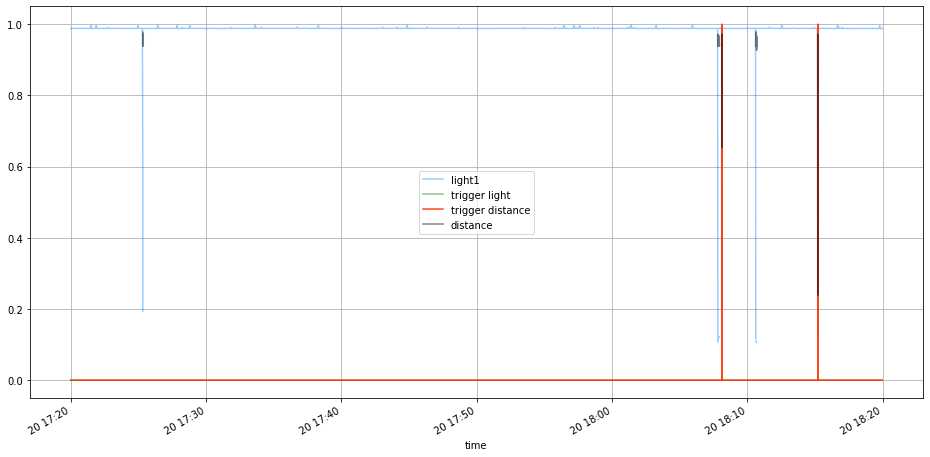

In [119]:
mask =(data.index > '2020-6-20T17:20') & (data.index <= '2020-6-20T18:20')
plot(data, mask, light=True)

In [150]:
mask =(data.index <= '2020-6-20T21:00')
plot(data, mask)

KeyError: 'light sensitive'

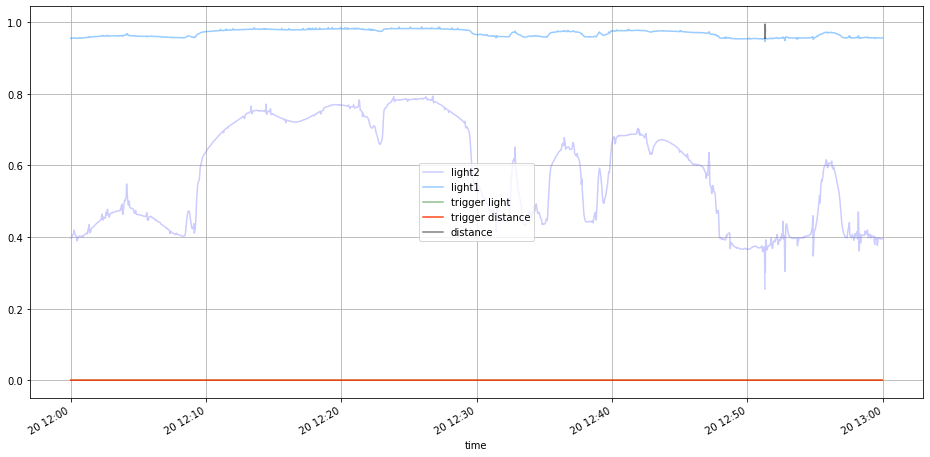

In [143]:
mask = (data.index > '2020-6-20T12:00') & (data.index <= '2020-6-20T13:00')
plot(data, mask, distance=True)

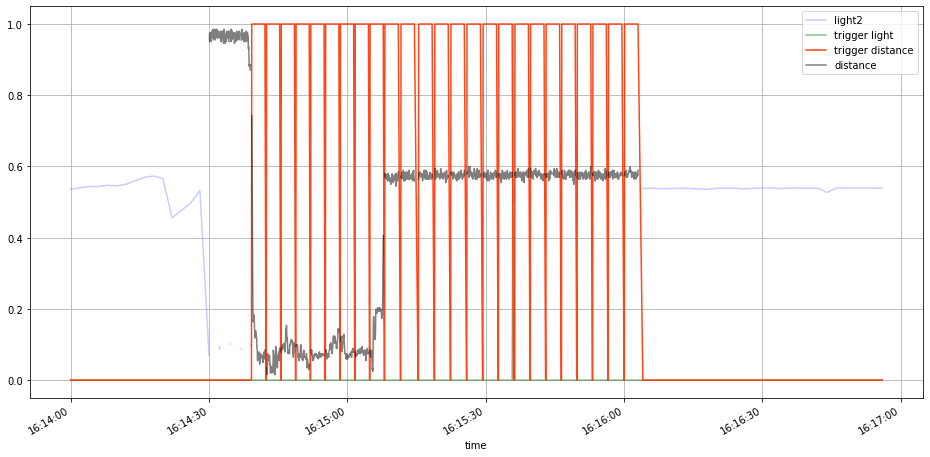

In [139]:
mask = (data.index > '2020-6-20T16:14') & (data.index <= '2020-6-20T16:17')
plot(data, mask, distance=True)

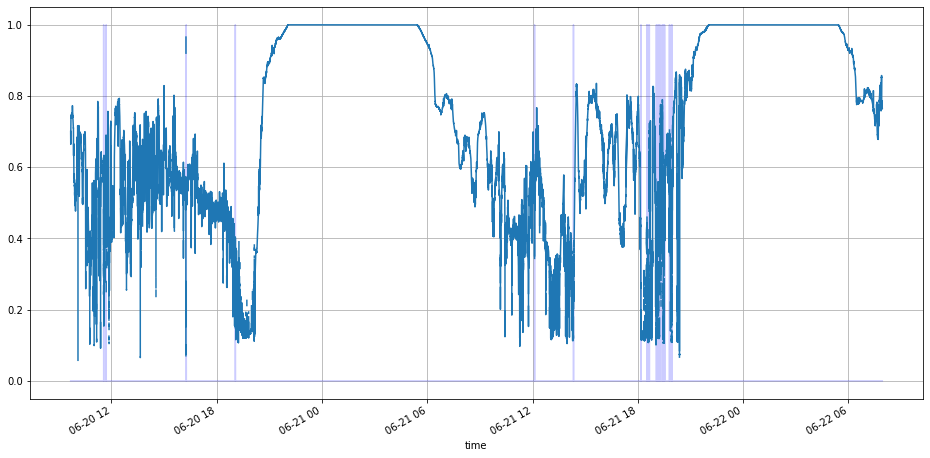

In [89]:
trigger_light.plot(c=(0,0,1,0.2))
data['light2'].plot()